In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#import astropy 
#from astropy import units as u
#from astropy import constants as const

%matplotlib inline 
#for jupyter notebook

In [2]:
pathSOURCES = "load_nz/WFIRST_zdist/original/WFIRST_zdist_sources_bin"
N_bins_SOURCES = 10

sources = {}
for i in range(N_bins_SOURCES):
    temp = np.loadtxt(pathSOURCES+str(i)+".txt")
    sources[i] = temp
    
    
pathLENSES = "load_nz/WFIRST_zdist/original/WFIRST_zdist_lenses_bin"
N_bins_LENSES = 10

lenses = {}
for i in range(N_bins_LENSES):
    temp = np.loadtxt(pathLENSES+str(i)+".txt")
    lenses[i] = temp

these do not work


(1, 10)

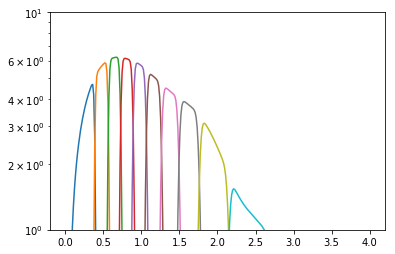

In [3]:
print("these do not work")
for i in range(N_bins_SOURCES):
    plt.plot(sources[i][:,0], sources[i][:,1])
plt.yscale("log")
plt.ylim(1, 10)

(1, 10)

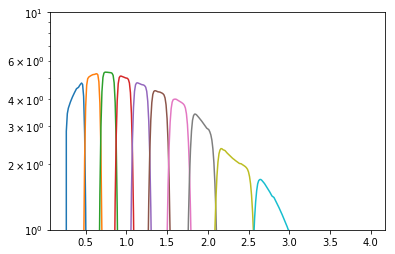

In [4]:

for i in range(N_bins_LENSES):
    plt.plot(lenses[i][:,0], lenses[i][:,1])
plt.yscale("log")
plt.ylim(1, 10)

## I will resample all of them to have the same redshift spacing

these do not work


(0, 0.5)

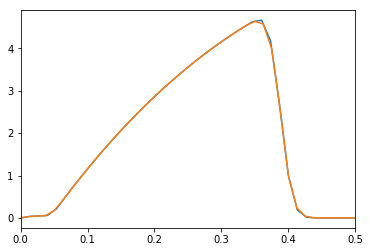

In [5]:
print("these do not work")
z = np.arange(0,4,0.0125)
plt.plot(sources[0][:,0], sources[0][:,1], label="sources, not working")
new = np.interp(z, sources[0][:,0], sources[0][:,1])
plt.plot(z, new)
plt.xlim(0,0.5)

In [6]:

z = np.arange(0,4,0.0125)
new_sources = {}
for i in range(N_bins_SOURCES):
    tmp = np.interp(z, sources[i][:,0], sources[i][:,1])
    new_sources[i] = np.array([z, tmp]).T

new_lenses = {}
for i in range(N_bins_LENSES):
    tmp = np.interp(z, lenses[i][:,0], lenses[i][:,1])
    new_lenses[i] = np.array([z, tmp]).T

Text(0.5, 1.0, 'sources')

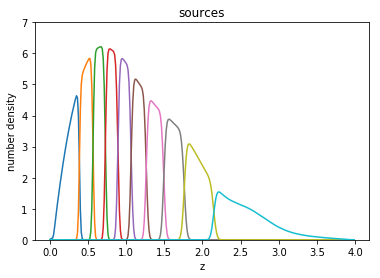

In [15]:
for i in range(N_bins_SOURCES):
    plt.plot(new_sources[i][:,0], new_sources[i][:,1])
#plt.yscale("log")
plt.ylim(0, 7)
plt.xlabel("z")
plt.ylabel("number density")
plt.title("sources")

Text(0.5, 1.0, 'lenses')

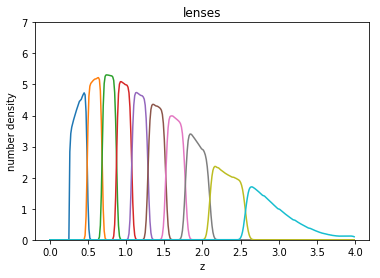

In [17]:
for i in range(N_bins_LENSES):
    plt.plot(new_lenses[i][:,0], new_lenses[i][:,1])
#plt.yscale("log")
plt.ylim(0, 7)
plt.xlabel("z")
plt.ylabel("number density")
plt.title("lenses")

In [8]:
new_pathSOURCES = "load_nz/WFIRST_zdist/WFIRST_zdist_sources_bin"
for i in range(N_bins_SOURCES):
    np.savetxt(new_pathSOURCES+str(i)+".txt",new_sources[i])


new_pathLENSES = "load_nz/WFIRST_zdist/WFIRST_zdist_lenses_bin"
for i in range(N_bins_LENSES):
    np.savetxt(new_pathLENSES+str(i)+".txt",new_lenses[i])

## Which of the bin combinations have to be excluded

Lenses need to be in front of sources


In [70]:
#calc average for each bin
s_mean = np.zeros(N_bins_SOURCES)
for i in range(N_bins_SOURCES):
    s_mean[i]= np.average(new_sources[i][:,0], weights=new_sources[i][:,1])

l_mean = np.zeros(N_bins_LENSES)
for i in range(N_bins_LENSES):
    l_mean[i]= np.average(new_lenses[i][:,0], weights=new_lenses[i][:,1])

In [94]:
#this is not the right way
cut = ""
n_cut = 0
keep = ""
n_keep = 0

for i, l in enumerate(l_mean):
    for j, s in enumerate(s_mean):
        if(l > s-0.26):
            cut = cut+str(i+1)+","+str(j+1)+" "
            n_cut += 1
        else:
            keep = keep+str(i+1)+","+str(j+1)+" "
            n_keep += 1
print("We cut {}".format(n_cut))
print(cut)
print("We keep {}".format(n_keep))
print(keep)
print("this was a first test, not the correct way yet")

We cut 68
1,1 1,2 2,1 2,2 2,3 2,4 3,1 3,2 3,3 3,4 3,5 4,1 4,2 4,3 4,4 4,5 4,6 5,1 5,2 5,3 5,4 5,5 5,6 5,7 6,1 6,2 6,3 6,4 6,5 6,6 6,7 6,8 7,1 7,2 7,3 7,4 7,5 7,6 7,7 7,8 8,1 8,2 8,3 8,4 8,5 8,6 8,7 8,8 8,9 9,1 9,2 9,3 9,4 9,5 9,6 9,7 9,8 9,9 10,1 10,2 10,3 10,4 10,5 10,6 10,7 10,8 10,9 10,10 
We keep 32
1,3 1,4 1,5 1,6 1,7 1,8 1,9 1,10 2,5 2,6 2,7 2,8 2,9 2,10 3,6 3,7 3,8 3,9 3,10 4,7 4,8 4,9 4,10 5,8 5,9 5,10 6,9 6,10 7,9 7,10 8,10 9,10 


In [169]:
s_min = np.zeros(N_bins_SOURCES)
s_max = np.zeros(N_bins_SOURCES)
for i in range(N_bins_SOURCES):
    #tmp = np.nonzero(sources[i][:,1])[0]#exactly nonzero does not give the right result
    tmp = np.nonzero(sources[i][:,1] > 9e-6)[0]
    s_min[i] = new_sources[i][tmp[0],0]
    s_max[i] = new_sources[i][tmp[-1],0]
    #s_mean[i]= np.average(new_sources[i][:,0], weights=new_sources[i][:,1])

l_min = np.zeros(N_bins_LENSES)
l_max = np.zeros(N_bins_LENSES)
for i in range(N_bins_LENSES):
    #tmp = np.nonzero(lenses[i][:,1])[0]
    tmp = np.nonzero(lenses[i][:,1] > 9e-6)[0]
    l_min[i] = new_lenses[i][tmp[0],0]
    l_max[i] = new_lenses[i][tmp[-1],0]
    #l_mean[i]= np.average(new_lenses[i][:,0], weights=new_lenses[i][:,1])

In [170]:
cut = ""
n_cut = 0
keep = ""
n_keep = 0

for i, l in enumerate(l_max):
    for j, s in enumerate(s_min):
        if(l < s):
            keep = keep+str(i+1)+","+str(j+1)+" "
            n_keep += 1
        else:
            cut = cut+str(i+1)+","+str(j+1)+" "
            n_cut += 1
            
print("We cut {}".format(n_cut))
print(cut)
print("We keep {}".format(n_keep))
print(keep)

We cut 68
1,1 1,2 2,1 2,2 2,3 3,1 3,2 3,3 3,4 4,1 4,2 4,3 4,4 4,5 5,1 5,2 5,3 5,4 5,5 5,6 5,7 6,1 6,2 6,3 6,4 6,5 6,6 6,7 6,8 7,1 7,2 7,3 7,4 7,5 7,6 7,7 7,8 7,9 8,1 8,2 8,3 8,4 8,5 8,6 8,7 8,8 8,9 8,10 9,1 9,2 9,3 9,4 9,5 9,6 9,7 9,8 9,9 9,10 10,1 10,2 10,3 10,4 10,5 10,6 10,7 10,8 10,9 10,10 
We keep 32
1,3 1,4 1,5 1,6 1,7 1,8 1,9 1,10 2,4 2,5 2,6 2,7 2,8 2,9 2,10 3,5 3,6 3,7 3,8 3,9 3,10 4,6 4,7 4,8 4,9 4,10 5,8 5,9 5,10 6,9 6,10 7,10 


1,3 1,4 1,5 1,6 1,7 1,8 1,9 1,10 2,4 2,5 2,6 2,7 2,8 2,9 2,10 3,5 3,6 3,7 3,8 3,9 3,10 4,6 4,7 4,8 4,9 4,10 5,8 5,9 5,10 6,9 6,10 7,10

edge cases: 1,2 gets cut, but 4,6 barely stays in 

In [98]:
#off diagonals for galaxy galaxy -> sources
cut = ""
n_cut = 0
keep = ""
n_keep = 0
for i in range(N_bins_LENSES):
    for j  in range(N_bins_LENSES):
        if(i < j):
            cut = cut+str(i+1)+","+str(j+1)+" "
            n_cut += 1
        elif (i == j):
            keep = keep+str(i+1)+","+str(j+1)+" "
            n_keep += 1
print("We cut {}".format(n_cut))
print(cut)
print("We keep {}".format(n_keep))
print(keep)

We cut 45
1,2 1,3 1,4 1,5 1,6 1,7 1,8 1,9 1,10 2,3 2,4 2,5 2,6 2,7 2,8 2,9 2,10 3,4 3,5 3,6 3,7 3,8 3,9 3,10 4,5 4,6 4,7 4,8 4,9 4,10 5,6 5,7 5,8 5,9 5,10 6,7 6,8 6,9 6,10 7,8 7,9 7,10 8,9 8,10 9,10 
We keep 10
1,1 2,2 3,3 4,4 5,5 6,6 7,7 8,8 9,9 10,10 


## visualizing the difficulty to decide of bins are destinct


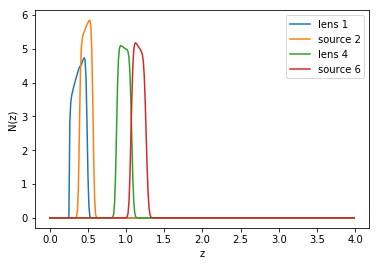

In [172]:
#1,2
plt.plot(new_lenses[0][:,0], new_lenses[0][:,1], label="lens 1")
plt.plot(new_sources[1][:,0], new_sources[1][:,1], label="source 2")

#4,6
plt.plot(new_lenses[3][:,0], new_lenses[3][:,1], label="lens 4")
plt.plot(new_sources[5][:,0], new_sources[5][:,1], label="source 6")

plt.xlabel("z")
plt.ylabel("N(z)")
plt.legend()
#plt.yscale("log")
#plt.ylim(1e-6, 10)

In [155]:
l_max[4]

1.1625

In [156]:
s_min[6]

1.075